In [21]:
import pandas as pd

In [22]:
import numpy as np

In [23]:

# Load dataset
data = pd.read_csv('cleaned_recipes_.csv')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

scaled_data = data.copy()
# Features for similarity
features = [
    'RecipeCategory', 'RecipeIngredientParts',
    'Calories', 'FatContent', 'SaturatedFatContent',
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
    'FiberContent', 'SugarContent', 'ProteinContent'
]

# Extract only the relevant features
scaled_data = scaled_data[features]

# Preprocessing
# 1. Numerical Features: Standardize
# 2. Categorical Features: One-Hot Encode
numerical_features = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent'
]
categorical_features = ['RecipeCategory', 'RecipeIngredientParts']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ]
)

# Apply preprocessing
processed_data = preprocessor.fit_transform(scaled_data)
processed_data

<339121x325315 sparse matrix of type '<class 'numpy.float64'>'
	with 3730331 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Train the k-Nearest Neighbors model
model_knn = NearestNeighbors(metric='cosine', n_neighbors=10)
model_knn.fit(processed_data)

print("Model Training Completed.")


Model Training Completed.


In [86]:
def find_similar_recipes(recipe_id, data, knn_model, preprocessor, n_neighbors=10):
    """
    Find similar recipes to a given recipe.

    Args:
        recipe_id (int): Index of the recipe to find similar recipes for.
        data (DataFrame): Original dataset.
        knn_model (NearestNeighbors): Trained KNN model.
        preprocessor (ColumnTransformer): Preprocessing pipeline.
        n_neighbors (int): Number of similar recipes to return.

    Returns:
        DataFrame: Similar recipes with their distances.
    """
    # Preprocess the recipe features
    recipe_features = preprocessor.transform(data.iloc[[recipe_id]])
    
    # Find nearest neighbors
    distances, indices = knn_model.kneighbors(recipe_features, n_neighbors=n_neighbors)
    
    # Retrieve similar recipes
    similar_recipes = data.iloc[indices[0]].copy()
    similar_recipes['Distance'] = distances[0]
    
    return similar_recipes

# Example: Find similar recipes to the first recipe in the dataset
recipe_id = 1
similar_recipes = find_similar_recipes(recipe_id, data, model_knn, preprocessor, n_neighbors=10)

print("\nSimilar Recipes:")
similar_recipes



Similar Recipes:


,RecipeId,Name,CookTime,RecipeServings,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,FatContent,...,FatContentPerPortion,SaturatedFatContentPerPortion,CholesterolContentPerPortion,SodiumContentPerPortion,CarbohydrateContentPerPortion,FiberContentPerPortion,SugarContentPerPortion,ProteinContentPerPortion,HealthStatus,Distance
1,39,Biryani,25 minutes,6.0,Chicken Breast,[],"saffron, milk, hot green chili peppers, onions...",3.000000,1110.7,58.8,...,9.800,2.766667,62.133333,61.400000,14.066667,1.500,3.400000,10.566667,Healthy,0.000000
159770,266440,Cafe Martorano Chicken Cutlet Downtown,15 minutes,2.0,Chicken Breast,[],"chicken cutlets, salt, pepper, eggs, flour, bu...",5.000000,1356.0,59.4,...,29.700,12.100000,223.750000,940.250000,61.650000,7.200,9.750000,41.700000,Moderate because : 35.0 > FatContentPerPortion...,0.096854
89364,155194,"Chicken Divan Tonight, Chicken Tetrazzini Next...",24 minutes,4.0,Chicken Breast,[],"boneless skinless chicken breasts, shallots, e...",4.500000,1419.8,74.7,...,18.675,7.625000,85.075000,273.500000,21.100000,2.325,3.225000,23.400000,Moderate because : 11.0 > SaturatedFatContentP...,0.103623
4573,9223,Samantha's Fabulous Chicken and Eggplant (Aube...,30 minutes,2.0,Chicken Breast,[],"chicken cutlet, salted butter, olive oil, eggp...",4.500000,1465.6,98.9,...,49.450,15.150000,169.900000,649.500000,28.900000,5.900,5.600000,38.600000,Unhealthy because : FatContentPerPortion > 35.0,0.110745
59404,106041,Cabbage Rolls,1 hour,1.0,One Dish Meal,[],"cabbage, ground beef, rice, egg, salt, pepper,...",4.632096,2943.9,143.3,...,143.300,55.200000,828.400000,834.100000,205.800000,23.600,32.900000,200.900000,Unhealthy because : FatContentPerPortion > 35.0,0.116771
95394,164894,Soft Chicken Tacos,5 hours,5.0,Chicken Breast,"['1', '1', '1', '1/3', '2', '2', '1/4', '10', ...","broiler chickens, broiler-fryer chickens, toma...",4.500000,1214.6,66.8,...,13.360,4.380000,53.600000,368.300000,14.660000,1.460,1.960000,15.680000,Healthy,0.117090
204544,336174,Chicken Parmigiana - Tyler Florence,40 minutes,4.0,Chicken Breast,[],"extra virgin olive oil, onion, kosher salt, fr...",4.632096,1169.4,55.8,...,13.950,4.400000,60.375000,429.200000,24.525000,2.100,3.900000,17.375000,Healthy,0.117611
34133,61929,Lemon Rosemary Chicken,2 hours,6.0,Chicken Breast,"['1/2', '1', '1', '1', '2', '1 1/2', '6 1/2 - ...","dried rosemary, garlic powder, salt, black pep...",4.632096,1091.5,69.6,...,11.600,2.833333,38.616667,179.483333,9.116667,1.300,1.566667,10.366667,Healthy,0.118685
122271,208254,Chicken Parmigiana,40 minutes,4.0,Chicken Breast,[],"olive oil, olive oil, onion, garlic cloves, ba...",5.000000,1348.6,53.1,...,13.275,4.300000,60.250000,429.450000,35.125000,2.575,4.150000,19.200000,Healthy,0.119596
180486,298916,Ultimate Chicken Parmigiana,40 minutes,4.0,Chicken Breast,[],"extra virgin olive oil, extra virgin olive oil...",4.000000,1348.6,53.1,...,13.275,4.300000,60.250000,429.450000,35.125000,2.575,4.150000,19.200000,Healthy,0.119596


In [87]:
query_index = 1  # Index of the recipe you want to evaluate
distances, indices = model_knn.kneighbors(processed_data[query_index])

average_distance = np.mean(distances)
print(f"Average distance for query recipe {query_index}: {average_distance:.5f}")

Average distance for query recipe 1: 0.10206


In [88]:
threshold = 0.2  # Cosine distance threshold for similarity

# Count how many neighbors are considered similar
similar_neighbors = np.sum(distances < threshold)
print(f"Number of similar neighbors (distance < {threshold}): {similar_neighbors}")

Number of similar neighbors (distance < 0.2): 10


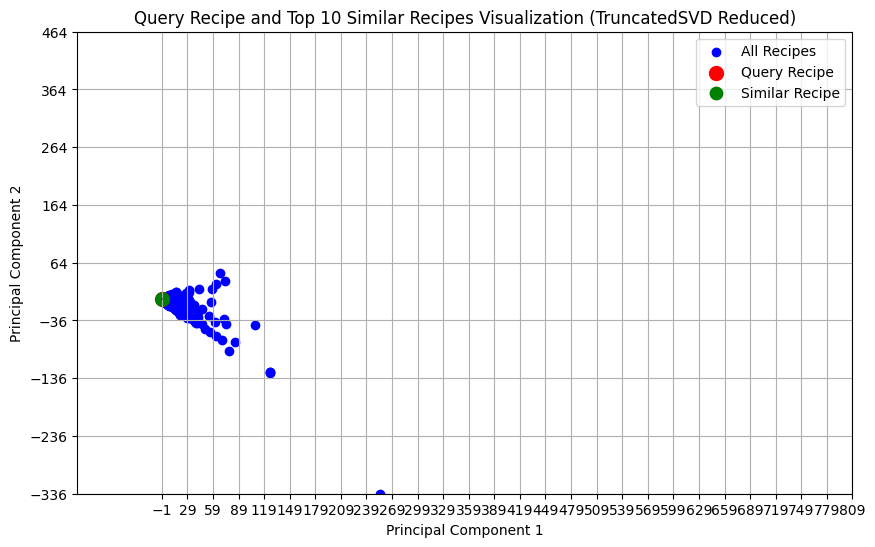

In [89]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Use TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(processed_data)

# Find nearest neighbors for visualization
query_index = 0  # Example query index (replace with the index of your query recipe)
distances, indices = model_knn.kneighbors(processed_data[query_index].reshape(1, -1), n_neighbors=10)

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='blue', label='All Recipes')

# Highlight the query recipe
plt.scatter(reduced_data[query_index, 0], reduced_data[query_index, 1], color='red', label='Query Recipe', s=100)

# Plot top 10 similar recipes (neighbors)
for neighbor_idx in indices[0]:
    plt.scatter(reduced_data[neighbor_idx, 0], reduced_data[neighbor_idx, 1], color='green', label='Similar Recipe' if neighbor_idx == indices[0][0] else "", s=80)

# Add lines connecting the query recipe to its nearest neighbors
for neighbor_idx in indices[0]:
    plt.plot(
        [reduced_data[query_index, 0], reduced_data[neighbor_idx, 0]],
        [reduced_data[query_index, 1], reduced_data[neighbor_idx, 1]],
        'k--', alpha=0.6  # Dashed lines for connections
    )

# Define zoom (adjust these values as needed)
x_min, x_max = -100, 200  # Example range for the X axis
y_min, y_max = -100, 300  # Example range for the Y axis

# Apply the zoom by setting the limits of the axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Define ticks
plt.xticks(range(int(min(reduced_data[:, 0])), int(max(reduced_data[:, 0])) + 1, 30))  # Pas de 30 pour l'axe X
plt.yticks(range(int(min(reduced_data[:, 1])), int(max(reduced_data[:, 1])) + 1, 100))  # Pas de 100 pour l'axe Y

# Add graph details
plt.title('Query Recipe and Top 10 Similar Recipes Visualization (TruncatedSVD Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [91]:
import joblib

joblib.dump(model_knn, 'knn_unsupervised_model_.pkl')
joblib.dump(preprocessor, 'unsupervised_preprossesor_.pkl')


['unsupervised_preprossesor_.pkl']